In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
df = pd.read_csv('Sales_add.csv')
df

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [4]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


### 3.Whether there is any increase in sales after stepping into digital marketing 

PAIRED SAMPLE T-TEST

Null Hypothesis (H0) : There is an increase in sales after stepping into digital marketing

Alternative Hypothesis (H1) : There is no increase in sales after stepping into digital marketing

ɑ : 0.05

Text(0, 0.5, 'Frequency')

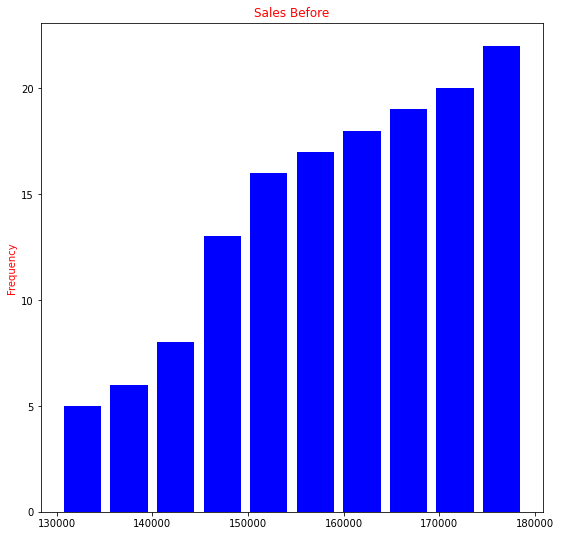

In [32]:
plt.figure(figsize=(9,9))
plt.hist(df['Sales_before_digital_add(in $)'],color='blue',density=False,rwidth=0.8,cumulative=True)
plt.title('Sales Before',color='red')   
plt.xticks
plt.yticks
plt.ylabel('Frequency',color='red')

In [33]:
#Plotting histograms to find whether there is a normal distribution in the data

Text(0, 0.5, 'Frequency')

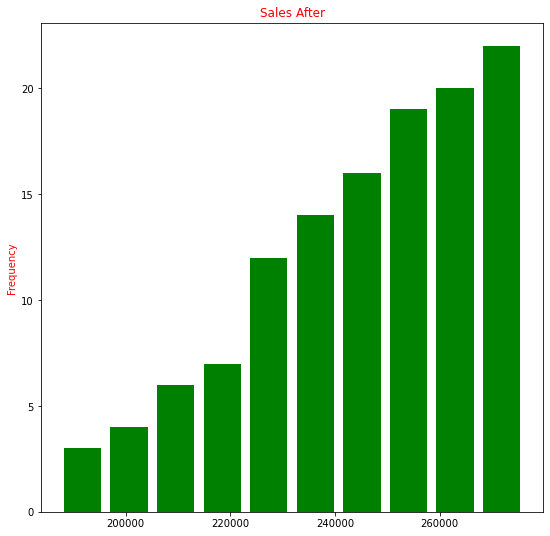

In [31]:
plt.figure(figsize=(9,9))
plt.hist(df['Sales_After_digital_add(in $)'],color='green',density=False,rwidth=0.8,cumulative=True)
plt.title('Sales After',color='red')   
plt.xticks
plt.yticks
plt.ylabel('Frequency',color='red')

The histograms of our data seems to be negatively skewed. 

In [34]:
#Shapiro-Wilk test for normality

In [25]:
stats.shapiro(df['Sales_before_digital_add(in $)'])

ShapiroResult(statistic=0.9306764006614685, pvalue=0.12674309313297272)

In [27]:
stats.shapiro(df['Sales_After_digital_add(in $)'])

ShapiroResult(statistic=0.9702125191688538, pvalue=0.7159563302993774)

"We cannot reject the hypothesis that the sample comes from a population which has a normal distribution".

In [28]:
stats.ttest_rel(df['Sales_before_digital_add(in $)'], df['Sales_After_digital_add(in $)'])

Ttest_relResult(statistic=-12.09070525287017, pvalue=6.336667004575778e-11)

P value>alpha implies that null hypothesis is true

INTERPRETATION OF THE RESULTS

A paired sample t-test was used to analyze the increase in sales before and after stepping into digital marketing to test if the digital marketing had a significant affect on the increase in sales.

It is evident that digital marketing has helped the company to do increased amount of sales

The number of sales before digital marketing  was lower (149239.954 ± 14844.04 units) compared to the number of sales post digital marketing (231123.727 ± 25556.77 units);

 Degrees of freedom(df) : 21
 
 There was a statistically significant increase in Sales (t(21)= -12.1, p= 6.3) of 81883.78 units.

### 2.Dependency between the features “Region” and “Manager”.

In [ ]:
#If they are totally dependent, then their factorizations will be the same

In [35]:
(df.Region.factorize()[0] == df.Manager.factorize()[0]).all()

False

It is found that the features Region and Manager are independent to each other

In [56]:
#Alternate Method

Chi-Square Test

Null hypothesis (H0) : No relation between the variables.

Alternate hypothes(H1): Significant relation between the two.

In [57]:
#To run the Chi-Square Test, the easiest way is to convert the data into a contingency table with frequencies

In [58]:
from scipy.stats import chi2_contingency

In [59]:
contigency= pd.crosstab(df['Region'], df['Manager']) 
contigency

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


<AxesSubplot:xlabel='Manager', ylabel='Region'>

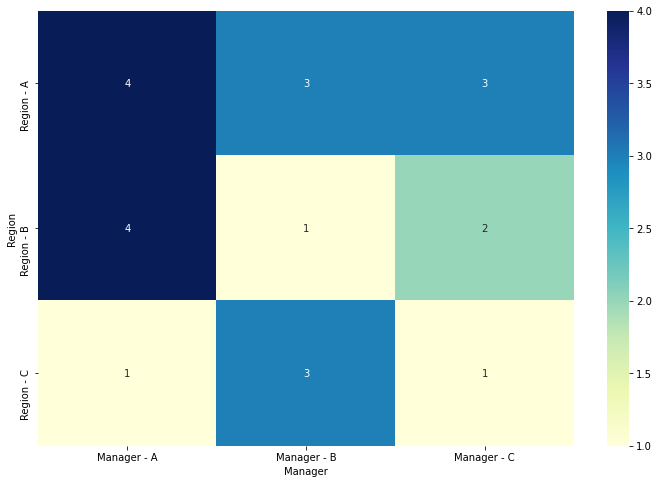

In [60]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [61]:
# Chi-square test of independence.                                             #chi2 : The test statistic
c, p, dof, expected = chi2_contingency(contigency)                             #p : The p-value of the test
# Print the p-value                                                            #dof :Degrees of freedom
print(p)                                                                       #expected :The expected frequencies, based on the marginal sums of the table

0.5493991051158094


INTERPRETATION


A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis.

Hence there is no significant relationship between "Region" and "Manager"
